# <p style="background-color:#6699ff;color:black;font-size:30px;text-align:center;border-radius:100px 100px;font-weight:bold;border-style:solid;border-color:blue;">ỨNG DỤNG THUẬT TOÁN CÂY QUYẾT ĐỊNH VÀO VIỆC PHÁT HIỆN GIAN LẬN TÍN DỤNG TRONG LĨNH VỰC TÀI CHÍNH 👨‍💼 </p>

### <p style="background-color:#78BAF0;color:black;font-size:25px;text-align:center;border-radius:35px 35px;border-style:solid;border-color:blue;">🔏Mô tả dữ liệu </p>


<br>1. Tiêu đề: Bộ dữ liệu tài chính tổng hợp để phát hiện gian lận.
<br>2. Nguồn: [https://www.kaggle.com/datasets/ealaxi/paysim1].
<br>3. Kích thước: Gồm 6362620 dòng và 12 cột
<br>4. Thông tin cột:
- step: phản ánh một đơn vị thời gian trong thực tế. Trong trường hợp này 1 bước là 1 giờ. Tổng số bước 744 (mô phỏng 30 ngày).
- type: CASH-IN, CASH-OUT, DEBIT, PAYMENT và TRANSFER.
- amount: số tiền giao dịch bằng nội tệ.
- nameOrig: khách hàng là người bắt bắt đầu giao dịch.
- oldbalanceOrg: số dư ban đầu trước khi giao dịch.
- newbalanceOrig: số dư ban đầu trước khi giao dịch.
- nameDest: khách hàng là người nhận giao dịch.
- oldbalanceDest: người nhận số dư ban đầu trước khi giao dịch. Lưu ý không có thông tin dành cho khách hàng bắt đầu bằng M (Merchants).
- newbalanceDest: người nhận số dư mới sau khi giao dịch. Lưu ý không có thông tin dành cho khách hàng bắt đầu bằng M (Merchants).
- isFraud: Đây là các giao dịch được thực hiện bởi các tác nhân lừa đảo bên trong mô phỏng. Trong tập dữ liệu cụ thể này, hành vi gian lận của các đại lý nhằm mục đích kiếm lợi bằng cách chiếm quyền kiểm soát tài khoản của khách hàng và cố gắng rút tiền bằng cách chuyển sang tài khoản khác rồi rút tiền ra khỏi hệ thống.



### <p style="background-color:#78BAF0;color:black;font-size:25px;text-align:center;border-radius:35px 35px;border-style:solid;border-color:blue;">✨ Nội dung chính </p>
1. Xây dựng hàm
  - 1.1. Hàm loại bỏ các giá trị ngoại lệ
  - 1.2. Hàm tiền xử lí giữ liệu
2. Đọc dữ liệu và thực hiện phân tích dữ liệu khám phá
3. Trực quan hoá dữ liệu
4. Chuẩn bị dữ liệu để đào tạo mô hình
  - 4.1. Xoá cột
  - 4.2. Mã hoá dữ liệu
  - 4.3. Loại bỏ các ngoại lệ
  - 4.4. Chia tỷ lệ dữ liệu
5. Thực hiện lấy mẫu và đào tạo mô hình
  - 5.1. Over Sampling (SMOTE)
  - 5.2. Thuật toán cây quyết định khi sử dụng chỉ số gini index
  - 5.3. Thuật toán cây quyết định khi sử dụng chỉ số entropy
  - 5.4. So sánh độ hiệu quả của thuật toán cây quyết định khi sử dụng chỉ số entropy so với chỉ số gini index


In [57]:
import pandas as pd 
import numpy as np # Xử lí lí dữ liệu
import matplotlib.pyplot as plt # Trực quan hoá dữ liệu
import seaborn as sns # Trực quan hoá dữ liệu
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Mã hoá dữ liệu
from imblearn.over_sampling import SMOTE # Oversampling 
from sklearn.model_selection import train_test_split # Data Splitting
from sklearn.tree import DecisionTreeClassifier # Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Metrics
from sklearn.metrics import classification_report

### 1. Xây dựng hàm
1.1 Hàm loại bỏ các giá trị ngoại lệ
  - Sử dụng phương pháp z-scores để loại bỏ các ngoại lệ

1.2 Hàm tiền xử lí dữ liệu
  - Tách C và M trong mỗi giá trị trong cột nameDest và lưu nó vào cột DestType mới
  - Xóa C và M trong mỗi giá trị trong cột nameDest và lưu nó dưới dạng số nguyên
  - Xóa C và M trong mỗi giá trị trong cột nameOrig và lưu nó dưới dạng số nguyên

In [58]:
# Tham số:
# 1. df = khung dữ liệu
# 2. sigma = giá trị của sigma, ở đây sẽ gán sigma có giá trị là 3
def RemoveOutliers(df, sigma=3, unique=10):
    for col in df.columns:
      if df[col].nunique() > unique:
        df = df[(df[col] > (df[col].mean() - df[col].std()*sigma )) & (df[col] < (df[col].mean() + df[col].std()*sigma ))]
    return df

# Hàm tiền xử lí dữ liệu
def preprocessing_data(df):
    df["DestType"] = [x[0] for x in df['nameDest']] 
    df['nameDest'] = np.array([x[1:] for x in df['nameDest']]).astype(np.int64)
    df['nameOrig'] = np.array([x[1:] for x in df['nameOrig']]).astype(np.int64) 
    return df

### 2. Đọc dữ liệu và thực hiện phân tích dữ liệu khám phá

In [59]:
# Đọc dữ liệu
df = pd.read_csv('PS_20174392719_1491204439457_log.csv') 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [60]:
df.shape # xem số lượng hàng và cột

(6362620, 11)

In [61]:
df.isnull().sum() # Kiểm tra giá trị null

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [62]:
df.duplicated().sum() # kiểm tra giá trị trùng lặp

0

In [63]:
df.describe().round(2) # Tính toán các giá trị thống kê và làm tròn chúng đến 2 chữ số thập phân

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [64]:
df.sample(9) # chọn ngẫu nhiên các hàng dữ liệu và hiển thị chúng

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5248936,371,CASH_OUT,80531.77,C351372316,0.00,0.00,C1574233956,1476196.45,1556728.22,0,0
949748,44,CASH_OUT,261354.03,C1802036031,41522.00,0.00,C1708173368,2232227.81,2493581.83,0,0
4925339,350,CASH_IN,169028.57,C436046508,42275.00,211303.57,C608736658,365840.01,196811.44,0,0
4118137,302,CASH_OUT,158603.60,C1451323938,0.00,0.00,C1807284258,1436056.05,1906375.32,0,0
5939658,404,PAYMENT,863.34,C1159445340,0.00,0.00,M213603661,0.00,0.00,0,0
4253337,306,TRANSFER,597047.19,C1341857628,45326.00,0.00,C709855421,0.00,597047.19,0,0
5448583,379,CASH_OUT,148640.13,C621042857,0.00,0.00,C757618434,532832.84,681472.97,0,0
3586533,262,CASH_OUT,201067.50,C1852358498,82068.26,0.00,C884656820,1660740.38,1861807.88,0,0
5720835,398,TRANSFER,1307721.78,C657995726,199905.00,0.00,C577403274,0.00,1307721.78,0,0


Một số bất thường trong dữ liệu:
<br>1. Trong trường hợp tiền mặt được chuyển từ nơi gửi đến nơi đến, newbalanceDest đôi khi không phản ánh sự thay đổi đó (có thể là gian lận).
<br>2. Trong trường hợp tiền mặt được chuyển từ nơi đi đến nơi đến, số tiền được yêu cầu không có trong oldbalanceOrg (có thể là gian lận).
<br>3. Các giá trị trong nameOrig đôi khi có 9 chữ số thay vì 10.
<br>4. Các giao dịch đơn lẻ từ 200000 trở lên phải được đánh dấu là 1 trong cột isFlaggedFraud nhưng nhiều khi lại không như vậy.

### 3. Trực quan hoá dữ liệu

In [65]:
df = preprocessing_data(df) # Tiền xử lí dữ liệu

In [66]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DestType
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,M
2,1,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,C
3,1,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,C
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,M


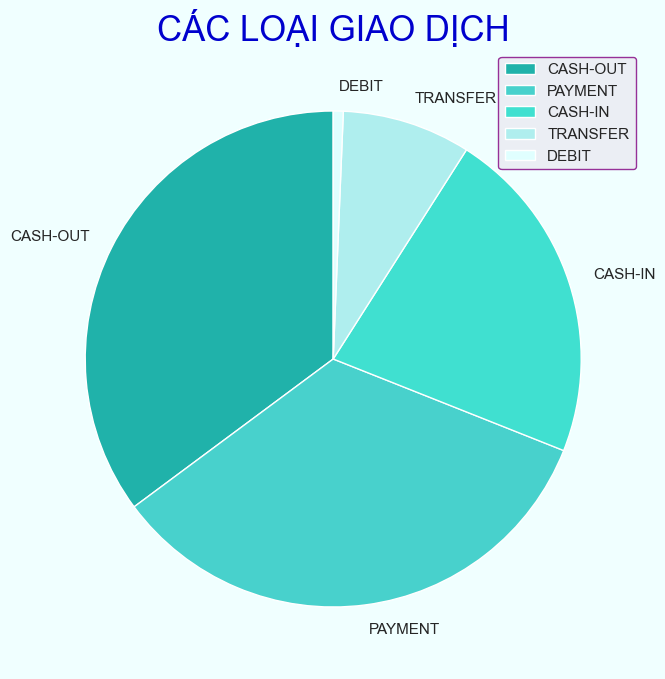

In [67]:
fig = plt.figure() # tạo đối tượng của lớp figure
color = ['lightseagreen', 'mediumturquoise', 'turquoise', 'paleturquoise', 'lightcyan'] # Màu sắc cho biểu đồ tròn
label = ['CASH-OUT', 'PAYMENT', 'CASH-IN', 'TRANSFER', 'DEBIT'] # Nhãn cho từng phần của biểu đồ hình tròn
plt.pie(df['type'].value_counts(), colors=color, labels=label, startangle=90) # Tạo biểu đồ với góc bắt đầu để vẽ đồ thị được đặt thành 90 độ
fig.patch.set_facecolor('azure') # Màu nền hồng
fig.set_size_inches(8, 9) # Tổng kích thước của biểu đồ 8x9 inch
plt.legend(edgecolor='purple') # Chú giải hiển thị với các cạnh màu tím thay vì màu trắng mặc định
plt.title('CÁC LOẠI GIAO DỊCH', fontsize=25, color='mediumblue') # Bộ tiêu đề cỡ chữ 18 và màu tím
plt.show() 

Dựa vào biểu đồ tròn có thể thấy CASH-OUT và PAYMENT là 2 loại giao dịch được sử dụng phổ biến nhất, trái lại DEBIT là loại giao dịch ít được sử dụng nhất chiếm tỉ lệ gần rất thấp gần như không đáng kể.

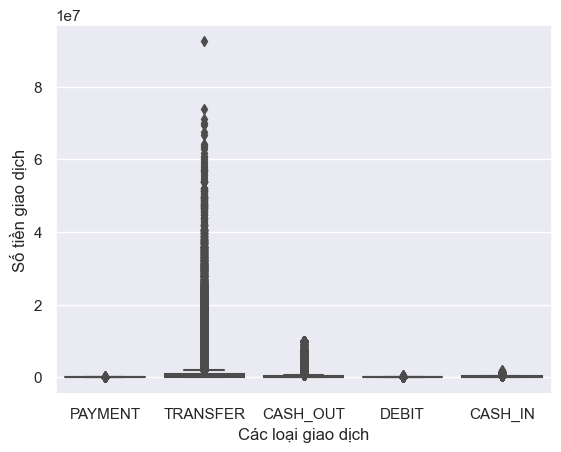

In [68]:
sns.set(style='darkgrid') # màu nền cho đồ thị
sns.boxplot(x='type', y='amount', data=df) # tạo biểu đồ box plot với các giá trị của cột 'type' trên trục x và giá trị của cột 'amount' trên trục y
plt.xlabel('Các loại giao dịch') # nhãn cho trục x
plt.ylabel('Số tiền giao dịch') # nhãn cho trục y
plt.show() # vẽ biểu đồ box plot

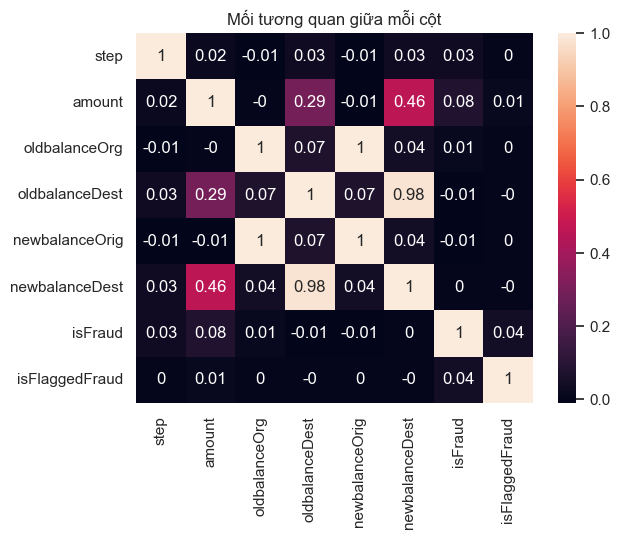

In [69]:
col = ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
sns.heatmap(df[col].corr().round(2), annot=True) # tạo biểu đồ với tất cả các giá trị được làm tròn đến 2 chữ số thập phân
plt.title('Mối tương quan giữa mỗi cột') # tiêu đề cho biểu đồ
plt.show()

Có thể nhận thấy sự tương quan giữa giao dịch gian lận (isFraud) với các thuộc tính khác gần như không đáng kể, sự tương quan lớn nhất của 1 giao dịch gian lận (IsFraud) là với thuộc tính (amount) nhưng giá trị trương quan chỉ đạt 0,08.

<Axes: >

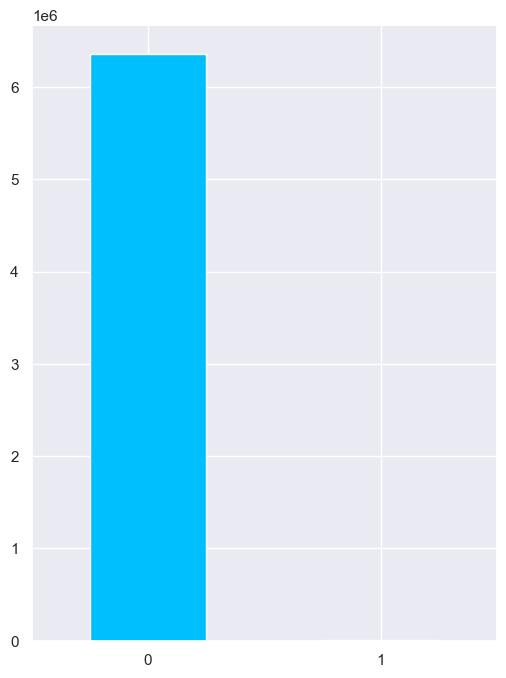

In [70]:
color = ['deepskyblue', 'blue'] 
df['isFraud'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0) 
# vẽ và trình bày đồ thị có kích thước hình 6 x 8 inch và sửa nhãn của trục x thành 0

Nhìn vào đồ thị có thể thấy rõ sự chệnh lệch cực kì lớn giữa giao dịch gian lận và không gian lận. Điều này là phù hợp với thực tế, nhưng để tránh trường hợp bị overfitting khi triển khai mô hình, nhóm sẽ dùng một số biện pháp để cân bằng dữ liệu phía bên dưới trước khi đào tạo mô hình để có được kết quả mong muốn nhất.

### 4. Chuẩn bị dữ liệu để đào tạo mô hình

##### 4.1. Xoá cột

In [71]:
df = df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)

Nhóm bỏ các cột 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest' và 'newbalanceDest' như đã lưu ý trong phần mô tả của tập dữ liệu. Ngoài ra cũng bỏ isFlaggedFraud vì nó vô dụng cùng với các cột nameDest và nameOrg vì chúng chỉ là id của người gửi và người nhận

##### 4.2. Mã hoá dữ liệu

In [72]:
# Mã hóa tính năng bằng chuỗi kiểu dữ liệu
ohe_columns = ['type', 'DestType'] # các tính năng được mã hóa thành số nguyên
ohe = OneHotEncoder(sparse=False).fit(df[ohe_columns]) # mã hóa các cột được chỉ định và trả về một mảng
encoded = ohe.transform(df[ohe_columns]) # biến đổi mảng
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out()) # chuyển đổi mảng thành một khung dữ liệu
df = pd.concat([df[[x for x in df.columns if x not in ohe_columns]].reset_index(drop=True),encoded_df], axis=1)
# cuối cùng ghép cả hai khung dữ liệu và trong quá trình loại bỏ các cột 'type' và 'DestType' bằng các cột được mã hóa

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##### 4.3. Loại bỏ các ngoại lệ

In [73]:
df = RemoveOutliers(df, 3) # Loại bỏ các ngoại lệ

##### 4.4. Chia tỷ lệ dữ liệu    

In [74]:
# Chia tỷ lệ dữ liệu (Scaling Data)
# Sử dụng MinMaxScaler để chia tỷ lệ dữ liệu

scaled = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)

### 5. Thực hiện lấy mẫu và đào tạo mô hình

##### 5.1. Over Sampling (SMOTE)

Over sampling là các phương pháp giúp giải quyết hiện tượng mất cân bằng mẫu bằng cách gia tăng kích thước mẫu thuộc nhóm thiểu số. Ở đây, nhóm quyết định chọn phương pháp Over sampling thay vì under samling do nhược điểm của phương pháp under sampling là kích thước mẫu sẽ bị giảm đáng kể dẫn đến dữ liệu sau cân bằng không đại diện cho phân phối của toàn bộ tập dữ liệu và thường dễ dẫn tới hiện tượng overfitting.

In [75]:
# Đầu tiên tách cột mục tiêu khỏi các cột khác để thực hiện Over Sampling

col = [c for c in df.columns.to_list() if c not in ['isFraud']] # Lưu tên các cột ngoài cột mục tiêu
X = df[col] # Tách cột mục tiêu khỏi các cột khác và lưu các cột vào khung dữ liệu khác
Y = df['isFraud'] # Tách cột mục tiêu khỏi các cột khác và lưu vào khung dữ liệu khác

SMOTE (Synthetic Minority Over-sampling) là phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu. Để gia tăng kích thước mẫu, với mỗi một mẫu thuộc nhóm thiểu số ta sẽ lựa chọn ra *k* mẫu láng giềng gần nhất với nó và sau đó thực hiện tổ hợp tuyến tính để tạo ra mẫu giả lập.

In [76]:
# Áp dụng SMOTE trong việc lấy mẫu cho thiểu số của hai giá trị (trong trường hợp này là 1) để cân bằng dữ liệu
smt = SMOTE(random_state=42, sampling_strategy='minority')
X_samp,Y_samp = smt.fit_resample(X,Y)

In [77]:
# Chuyển đổi các bộ dữ liệu trở lại khung dữ liệu
X_samp = pd.DataFrame(X_samp, columns=col)
Y_samp = pd.DataFrame(Y_samp, columns=['isFraud'])
df = pd.concat([X_samp, Y_samp], axis=1)

<Axes: xlabel='isFraud'>

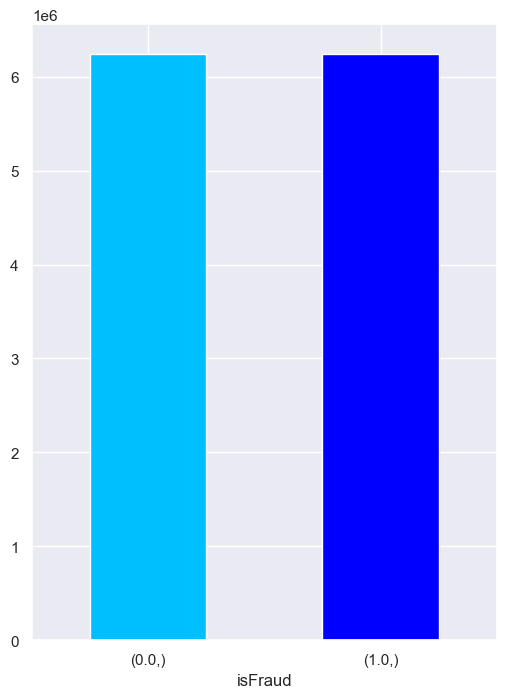

In [78]:
# Tỷ lệ mẫu sau khi lấy mẫu quá mức
color = ['deepskyblue', 'blue'] # Màu của Is Fraud
Y_samp.value_counts().plot.bar(figsize=(6,8), color=color, rot=0) 
# vẽ và trình bày đồ thị có kích thước hình 6 x 8 inch và đặt nhãn trục x thành 0

Sau khi áp dụng SMOTE để cân bằng dữ liệu có thể thấy số lượng giao dịch gian lận và không gian lận đã bằng nhau.

In [79]:
# Chia tập dữ liệu để đào tạo và thử nghiệm mô hình
X = df[col]
Y = df['isFraud']

In [80]:
# Chia dữ liệu thành 2 nhóm riêng biệt, một nhóm để huấn luyện mô hình và một nhóm để kiểm tra mô hình
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.20, random_state=42, stratify=df['isFraud'])

##### 5.2. Thuật toán cây quyết định khi sử dụng chỉ số gini index

In [81]:
# Huấn luyện mô hình
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [82]:
# Đánh giá mô hình thông qua các chỉ số đánh giá khác nhau
accuracy = accuracy_score(Y_test, clf_gini.predict(X_test))
precision = precision_score(Y_test, clf_gini.predict(X_test))
recall = recall_score(Y_test, clf_gini.predict(X_test))
f1 = f1_score(Y_test, clf_gini.predict(X_test))
conf_matrix = confusion_matrix(Y_test, clf_gini.predict(X_test))

In [83]:
# Hiển thị các giá trị
print("Accuracy:", accuracy.round(3))
print("Precision:", precision.round(3))
print("Recall:", recall.round(3))
print("F1-score:", f1.round(3))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.852
Precision: 0.847
Recall: 0.859
F1-score: 0.853
Confusion Matrix:
 [[4221767  774781]
 [ 702249 4294298]]


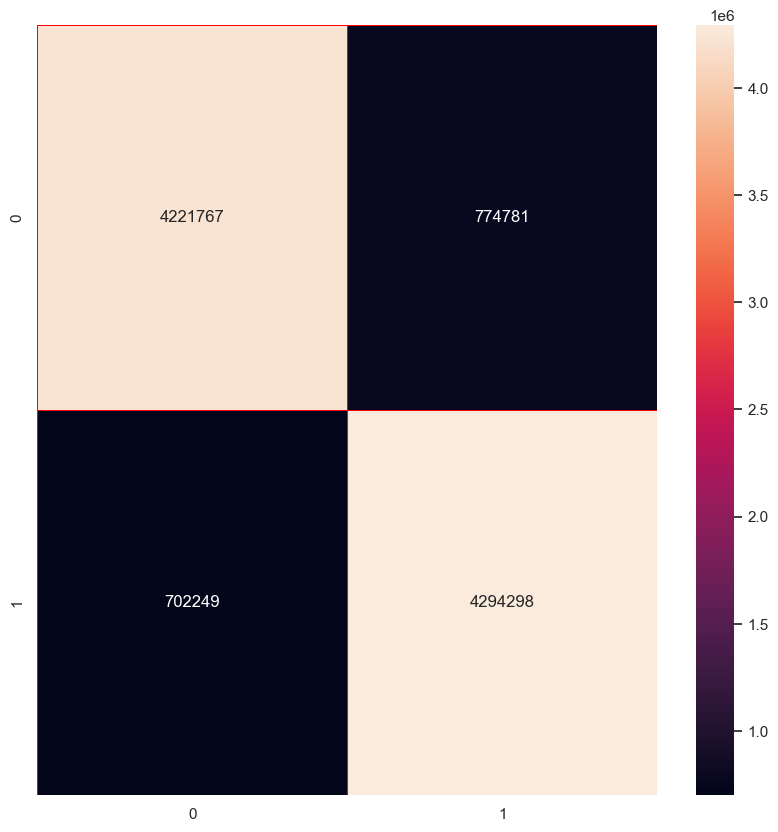

In [84]:
y_pred_en = clf_gini.predict(X_test) # Sử dụng mô hình phân loại clf_gini để dự đoán trên tập test
cm = confusion_matrix(Y_test, y_pred_en) # Tính toán ma trận nhầm lẫn
f,ax = plt.subplots(figsize=(10, 10)) # kích thước 10x10 inch
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)  
# các tham số lần lượt để: hiển thị giá trị của mỗi ô, độ rộng đường viên 0.5, màu đường viền đỏ, định dạng giá trị số trong ô là số nguyên
plt.show()

**Kết quả thuật toán**
<br>Sau khi thực hiện mô hình cây quyết định với chỉ số gini index, thu được ma trận kết quả sau: Khi sử dụng gần 5.000.000 đối tượng khách hàng của tập dữ liệu kiểm tra chạy qua mô hình, kết quả đạt được với độ chính xác là 85% và được diễn giải trong Bảng trên.
<br>Trong đó:
- 4.221.767 đối tượng khách hàng thực tế không có nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là không nghi ngờ gian lận.
- 4.294.298 đối tượng khách hàng thực tế có nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là có nghi ngờ gian lận.
- 702.249 đối tượng khách hàng thực tế không nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là có nghi ngờ gian lận.
- 774.781 đối tượng khách hàng thực tế có nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là không cố nghi ngờ gian lận.

##### 5.3. Thuật toán cây quyết định khi sử dụng chỉ số entropy

In [85]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [86]:
accuracy = accuracy_score(Y_test, clf_en.predict(X_test))
precision = precision_score(Y_test, clf_en.predict(X_test))
recall = recall_score(Y_test, clf_en.predict(X_test))
f1 = f1_score(Y_test, clf_en.predict(X_test))
conf_matrix = confusion_matrix(Y_test, clf_en.predict(X_test))

In [87]:
print("Accuracy:", accuracy.round(3))
print("Precision:", precision.round(3))
print("Recall:", recall.round(3))
print("F1-score:", f1.round(3))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.842
Precision: 0.89
Recall: 0.781
F1-score: 0.832
Confusion Matrix:
 [[4513201  483347]
 [1094055 3902492]]


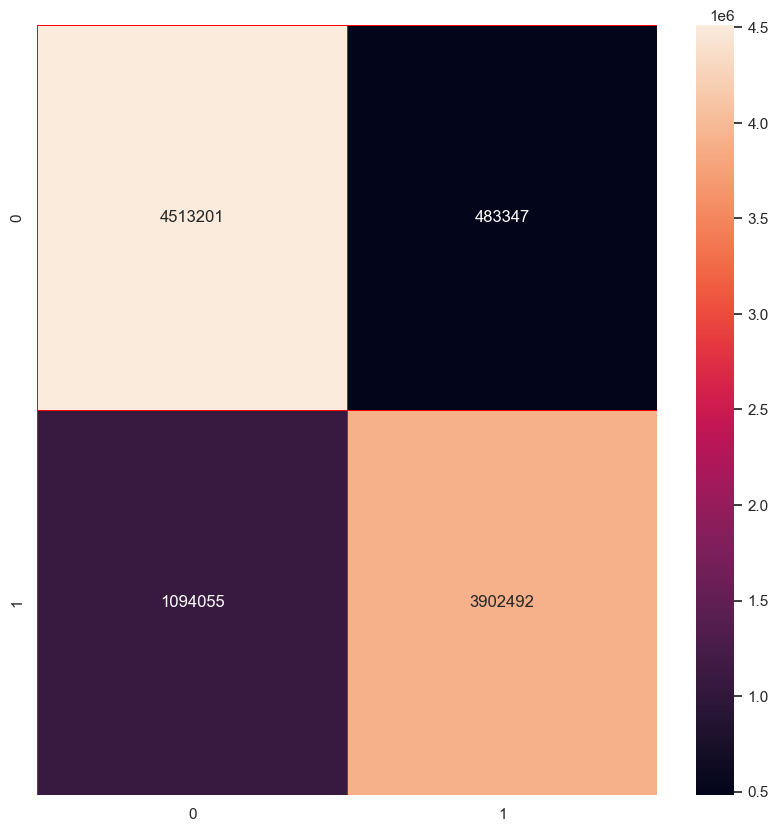

In [88]:
from sklearn.metrics import classification_report
y_pred_en = clf_en.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_en)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

**Kết quả thuật toán**
<br>Sau khi thực hiện mô hình cây quyết định với chỉ số entropy, thu được ma trận kết quả sau: Khi sử dụng gần 5.000.000 đối tượng khách hàng của tập dữ liệu kiểm tra chạy qua mô hình, kết quả đạt được với độ chính xác là 85% và được diễn giải trong Bảng trên.
<br>Trong đó:
- 4.513.201 đối tượng khách hàng thực tế không có nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là không nghi ngờ gian lận.
- 3.902.492 đối tượng khách hàng thực tế có nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là có nghi ngờ gian lận.
- 1.094.055 đối tượng khách hàng thực tế không nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là có nghi ngờ gian lận.
- 483.347 đối tượng khách hàng thực tế có nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là không cố nghi ngờ gian lận.

##### 5.4. Đánh giá độ hiệu quả của thuật toán cây quyết định khi sử dụng chỉ số entropy so với chỉ số gini index

In [89]:
entries = []
entries.append(['Sử dụng chỉ số Gini Index',accuracy_score(Y_test, clf_gini.predict(X_test)),
                                                 precision_score(Y_test, clf_gini.predict(X_test)), 
                                                 recall_score(Y_test, clf_gini.predict(X_test)),
                                                 f1_score(Y_test, clf_gini.predict(X_test))
                    ])

entries.append(['Sử dụng chỉ số entropy',accuracy_score(Y_test, clf_en.predict(X_test)),
                                              precision_score(Y_test, clf_en.predict(X_test)), 
                                              recall_score(Y_test, clf_en.predict(X_test)), 
                                              f1_score(Y_test, clf_en.predict(X_test))
                    ])

In [90]:
cp_df = pd.DataFrame(entries, 
                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'
                              ])
print(cp_df)

                       Model  Accuracy  Precision    Recall        F1
0  Sử dụng chỉ số Gini Index  0.852195   0.847155  0.859453  0.853260
1     Sử dụng chỉ số entropy  0.842151   0.889794  0.781038  0.831876


**Lựa chọn chỉ số**
<br>Sau khi thực hiện mô hình cây quyết định với 2 chỉ số gini index, entropy và dựa vào kết quả của các chỉ số đánh giá như Accuracy, Precision, Recall, F1 có thể thấy khi triển khai mô hình cây quyết định với chỉ số gini index sẽ cho kết quả tốt hơn. Ngoài ra dựa vào ma trận nhầm lẫn cũng có thấy đối tượng khách hàng thực tế không nghi ngờ gian lận và khi cho chạy qua mô hình cho kết quả là có nghi ngờ gian lận của mô hình cây quyết định khi sử dụng chỉ số gini index thấp hơn (702.249 so với 1.094.055 khi sử dụng chỉ số entropy), ở thực tế cũng ưu tiên giảm đối tượng ở lớp này xuống mức thấp nhất có thể.
<br>**Kết luận**
<br>Với bài toán và bộ dữ liệu trên thì lựa chọn chỉ số gini index làm chỉ số triển khai mô hình cây quyết định sẽ thu lại kết quả tốt hơn.        